In [329]:
import numpy as np
import matplotlib.pyplot as plt
import glob


In [510]:
allFishDir = r'G:\My Drive\adenosine_paper\adenosine_paper_data\behavior\0911_mrs_suramin\mrs_ctrl'
fishList = sorted(glob.glob(allFishDir + '\\*'))

In [512]:
newFishList = []
for fishDir in fishList:
    if not ('.ini' in fishDir):
        newFishList.append(fishDir)

fishList = newFishList
for fishDir in fishList:
    if not ('.ini' in fishDir):
        fish_dir = fishDir + '\\rawdata'
        fileListHT = sorted(glob.glob(fish_dir+'\\*head_tail_data.npz'))
        fileListStim = sorted(glob.glob(fish_dir+'\\*stimulus_data.npz'))

In [513]:
print(fishList)

['G:\\My Drive\\adenosine_paper\\adenosine_paper_data\\behavior\\0911_mrs_suramin\\mrs_ctrl\\2024-09-11_16-24-33_fish000', 'G:\\My Drive\\adenosine_paper\\adenosine_paper_data\\behavior\\0911_mrs_suramin\\mrs_ctrl\\2024-09-11_16-24-33_fish001', 'G:\\My Drive\\adenosine_paper\\adenosine_paper_data\\behavior\\0911_mrs_suramin\\mrs_ctrl\\2024-09-11_16-24-41_fish000', 'G:\\My Drive\\adenosine_paper\\adenosine_paper_data\\behavior\\0911_mrs_suramin\\mrs_ctrl\\2024-09-11_16-24-41_fish003']


In [514]:
j

10

In [517]:
fish_data = []
fish_stim = []
for fishDir in fishList:
    if not ('.ini' in fishDir):
        fish_dir = fishDir + '\\rawdata'
        fileListHT = sorted(glob.glob(fish_dir+'\\*head_tail_data.npz'))
        #print(fileListHT)
        fileListStim = sorted(glob.glob(fish_dir+'\\*stimulus_data.npz'))
        #print(fileListStim)
    trial = {}
    trial['tail_angle'] = []
    trial['bout'] = []
    trial['time'] = []
    trial['tail_vigor'] = []
    stim = {}
    stim['start_times'] = []
    for file in fileListHT:
        data = np.load(file)
        trial['tail_angle'].append(data['tail_tip_deflection'])
        trial['bout'].append(data['tail_bout_information'])
        trial['time'].append(data['camera_time'])
        trial['tail_vigor'].append(data['tail_vigor'])

    for file in fileListStim:
        stimdata = np.load(file)
        stim['start_times'].append(stimdata['stimulus_start_times'])
        
    fish_data.append(trial)
    fish_stim.append(stim)
    

In [518]:
print(i,j)

7 10


<Figure size 2100x1300 with 0 Axes>

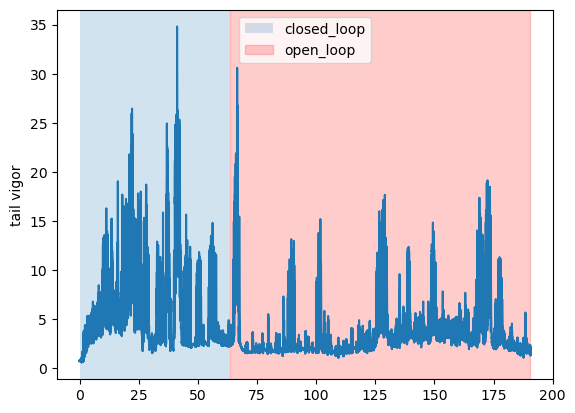

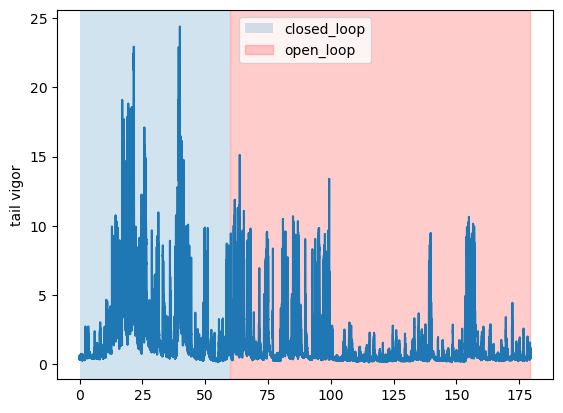

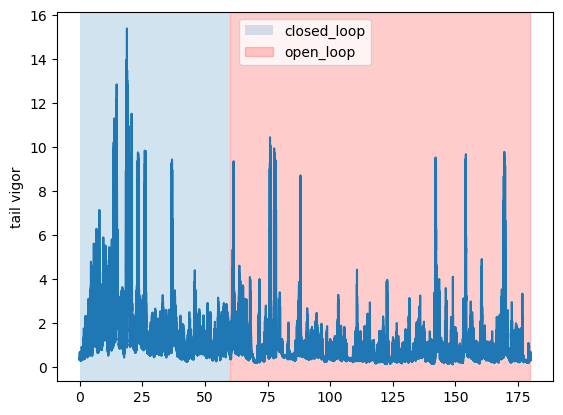

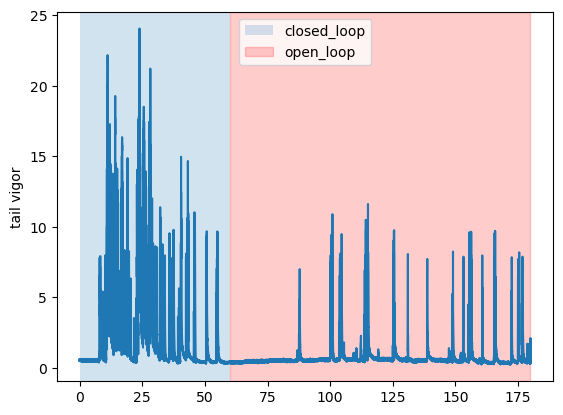

In [519]:
all_cl_ol = []
plt.figure(figsize=(21,13))
numFish = len(fishList)
avg_vigors = np.zeros([numFish,2])
for j in range(numFish):
    cl_inds = []
    ol_inds = []
    cl_ind_lengths = []
    ol_ind_lengths = []
    numTrials = len(fish_stim[j]['start_times'])
    for i in range(numTrials):
        cl_start = fish_stim[j]['start_times'][i][0]+60
        cl_end = fish_stim[j]['start_times'][i][0]+120
        ol_start = fish_stim[j]['start_times'][i][0]+120
        ol_end = fish_stim[j]['start_times'][i][0]+240
        cl_ind = np.where((fish_data[j]['time'][i] >= cl_start) & (fish_data[j]['time'][i] < cl_end))
        ol_ind = np.where((fish_data[j]['time'][i] >= ol_start) & (fish_data[j]['time'][i] < ol_end))
        cl_ind_lengths.append(len(cl_ind[0]))
        ol_ind_lengths.append(len(ol_ind[0]))
        cl_inds.append(cl_ind)
        ol_inds.append(ol_ind)
    cl_ind_length = np.min(cl_ind_lengths)
    ol_ind_length = np.min(ol_ind_lengths)
    cl_trials = np.zeros([numTrials,cl_ind_length])
    ol_trials = np.zeros([numTrials,ol_ind_length])
    for i in range(numTrials):
        indStart = cl_inds[i][0][0]
        indEnd = cl_inds[i][0][cl_ind_length-1]
        cl_trials[i] = np.abs(fish_data[j]['tail_angle'][i][indStart:indEnd+1] - np.mean(fish_data[j]['tail_angle'][i]))
        indStart = ol_inds[i][0][0]
        indEnd = ol_inds[i][0][ol_ind_length-1]
        ol_trials[i] = np.abs(fish_data[j]['tail_angle'][i][indStart:indEnd+1] - np.mean(fish_data[j]['tail_angle'][i]))
    mean_cl_trial = np.mean(cl_trials,axis=0)
    mean_ol_trial = np.mean(ol_trials,axis=0)
    cl_ol = np.concatenate((mean_cl_trial,mean_ol_trial))
    all_cl_ol.append(cl_ol)
    plt.figure()
    plt.plot(range(len(cl_ol))/fps_estimate,cl_ol)
    plt.axvspan(0, len(mean_cl_trial)/fps_estimate, alpha=0.2, label='closed_loop')
    plt.axvspan(len(mean_cl_trial)/fps_estimate,len(cl_ol)/fps_estimate, alpha=0.2, color = 'r',label='open_loop')
    plt.legend()
    plt.ylabel('tail vigor')
    #plt.ylim(0,100)
    avg_vigors[j,0] = np.mean(mean_cl_trial)
    avg_vigors[j,1] = np.mean(mean_ol_trial)
#plt.savefig(r'C:\Users\14076\Documents\ketamine_expts\with_marc\figures\prazosin.png',dpi=300)

In [521]:
a = []
for i in range(len(all_cl_ol)):
    a.append(len(all_cl_ol[i]))
trialLen = np.min(a)
print(trialLen)

70816


In [522]:
allMeanSwimVigors = np.zeros([len(all_cl_ol),trialLen])
for i in range(len(all_cl_ol)):
    allMeanSwimVigors[i] = all_cl_ol[i][0:trialLen]

<Figure size 2100x1300 with 0 Axes>

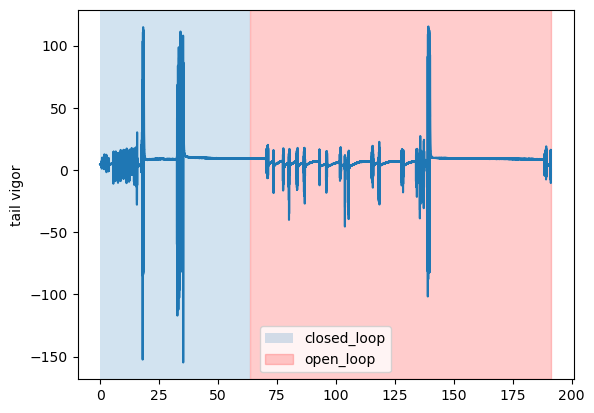

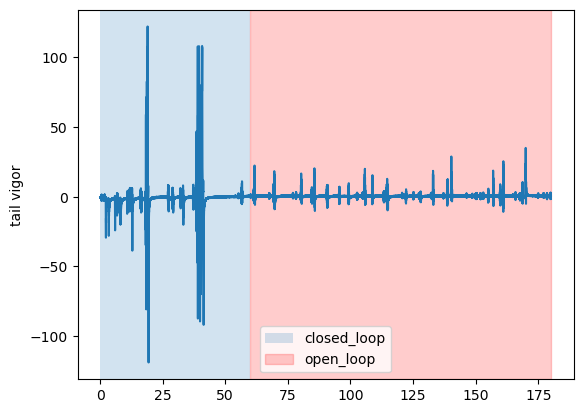

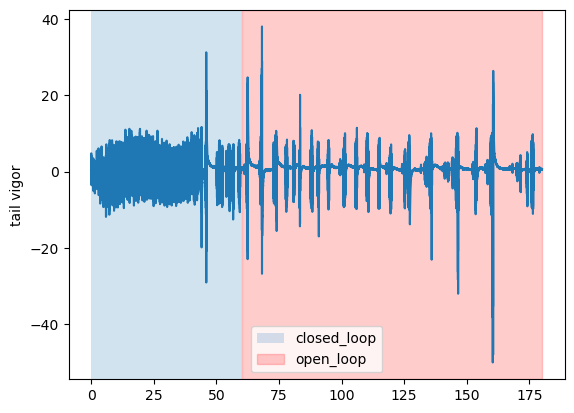

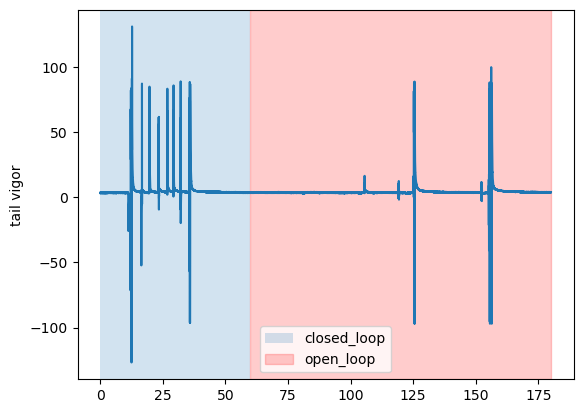

In [523]:
plt.figure(figsize=(21,13))
numFish = len(fishList)
avg_vigors = np.zeros([numFish,2])
for j in range(numFish):
    cl_inds = []
    ol_inds = []
    cl_ind_lengths = []
    ol_ind_lengths = []
    numTrials = len(fish_stim[j]['start_times'][i])
    for i in range(numTrials):
        cl_start = fish_stim[j]['start_times'][i][0]+60
        cl_end = fish_stim[j]['start_times'][i][0]+120
        ol_start = fish_stim[j]['start_times'][i][0]+120
        ol_end = fish_stim[j]['start_times'][i][0]+240
        cl_ind = np.where((fish_data[j]['time'][i] >= cl_start) & (fish_data[j]['time'][i] < cl_end))
        ol_ind = np.where((fish_data[j]['time'][i] >= ol_start) & (fish_data[j]['time'][i] < ol_end))
        cl_ind_lengths.append(len(cl_ind[0]))
        ol_ind_lengths.append(len(ol_ind[0]))
        cl_inds.append(cl_ind)
        ol_inds.append(ol_ind)
    cl_ind_length = np.min(cl_ind_lengths)
    ol_ind_length = np.min(ol_ind_lengths)
    cl_trials = np.zeros([numTrials,cl_ind_length])
    ol_trials = np.zeros([numTrials,ol_ind_length])
    for i in range(numTrials):
        indStart = cl_inds[i][0][0]
        indEnd = cl_inds[i][0][cl_ind_length-1]
        cl_trials[i] = fish_data[j]['tail_angle'][i][indStart:indEnd+1]
        indStart = ol_inds[i][0][0]
        indEnd = ol_inds[i][0][ol_ind_length-1]
        ol_trials[i] = fish_data[j]['tail_angle'][i][indStart:indEnd+1]
    mean_cl_trial = np.mean(cl_trials,axis=0)
    mean_ol_trial = np.mean(ol_trials,axis=0)
    cl_ol = np.concatenate((mean_cl_trial,mean_ol_trial))
    if(j!=-1):
        plt.figure()
        plt.plot(range(len(cl_ol))/fps_estimate,cl_ol)
        plt.axvspan(0, len(mean_cl_trial)/fps_estimate, alpha=0.2, label='closed_loop')
        plt.axvspan(len(mean_cl_trial)/fps_estimate,len(cl_ol)/fps_estimate, alpha=0.2, color = 'r',label='open_loop')
        plt.legend()
        plt.ylabel('tail vigor')
    avg_vigors[j,0] = np.mean(mean_cl_trial)
    avg_vigors[j,1] = np.mean(mean_ol_trial)
#plt.savefig(r'C:\Users\14076\Documents\ketamine_expts\with_marc\figures\prazosin.png',dpi=300)

In [524]:
plt.figure(figsize=(21,13))
numFish = len(fishList)
avg_vigors = np.zeros([numFish,2])
cl_ol_std_allfish = []
angle_allfish = []
for j in range(numFish):
    cl_inds = []
    ol_inds = []
    cl_ind_lengths = []
    ol_ind_lengths = []
    numTrials = len(fish_stim[j]['start_times'])
    for i in range(numTrials):
        cl_start = fish_stim[j]['start_times'][i][0]+60
        cl_end = fish_stim[j]['start_times'][i][0]+120
        ol_start = fish_stim[j]['start_times'][i][0]+120
        ol_end = fish_stim[j]['start_times'][i][0]+240
        cl_ind = np.where((fish_data[j]['time'][i] >= cl_start) & (fish_data[j]['time'][i] < cl_end))
        ol_ind = np.where((fish_data[j]['time'][i] >= ol_start) & (fish_data[j]['time'][i] < ol_end))
        cl_ind_lengths.append(len(cl_ind[0]))
        ol_ind_lengths.append(len(ol_ind[0]))
        cl_inds.append(cl_ind)
        ol_inds.append(ol_ind)
    cl_ind_length = np.min(cl_ind_lengths)
    ol_ind_length = np.min(ol_ind_lengths)
    cl_trials = np.zeros([numTrials,cl_ind_length])
    ol_trials = np.zeros([numTrials,ol_ind_length])
    cl_ol_trials = np.zeros([numTrials,cl_ind_length + ol_ind_length])
    cl_ol_std = np.zeros(np.shape(cl_ol_trials))
    post = 45
    for i in range(numTrials):
        indStart = cl_inds[i][0][0]
        indEnd = cl_inds[i][0][cl_ind_length-1]
        cl_trials[i] = fish_data[j]['tail_angle'][i][indStart:indEnd+1]
        indStart = ol_inds[i][0][0]
        indEnd = ol_inds[i][0][ol_ind_length-1]
        ol_trials[i] = fish_data[j]['tail_angle'][i][indStart:indEnd+1]
        cl_ol_trials[i] = np.concatenate((cl_trials[i],ol_trials[i]))
        cl_ol_app = np.append(cl_ol_trials[i],np.zeros([1,post]))
        for k in range(len(cl_ol_trials[i])):
            cl_ol_std[i,k] = np.std(cl_ol_app[k:(k+post)])
    mean_cl_trial = np.mean(cl_trials,axis=0)
    mean_ol_trial = np.mean(ol_trials,axis=0)
    cl_ol = np.concatenate((mean_cl_trial,mean_ol_trial))
    cl_ol_std_allfish.append(cl_ol_std)
    angle_allfish.append(cl_ol_trials)
    
#plt.savefig(r'C:\Users\14076\Documents\ketamine_expts\with_marc\figures\prazosin.png',dpi=300)

<Figure size 2100x1300 with 0 Axes>

In [525]:
from scipy.signal import find_peaks

In [526]:
ft_swim_times = {}
ft_swim_times['swims'] = []
ft_swim_times['times'] = []
for i in range(numFish):
    t_swim_times = []
    swim_raster = np.zeros(np.shape(cl_ol_std_allfish[i]))
    for j in range(len(cl_ol_std_allfish[i])):
        swims, mags = find_peaks(cl_ol_std_allfish[i][j], height = 0.5, distance = 90)
        t_swim_times.append(swims)
        swim_raster[j][swims] = mags['peak_heights']
    ft_swim_times['swims'].append(swim_raster)
    ft_swim_times['times'].append(t_swim_times)

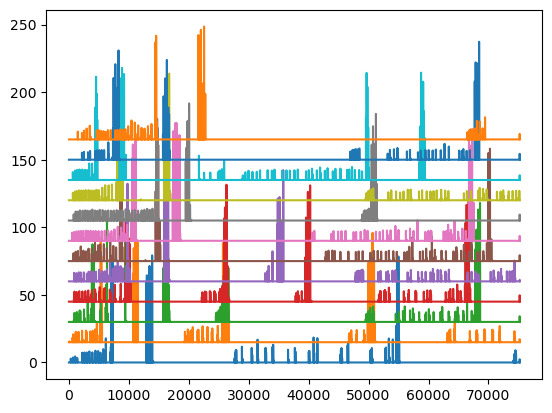

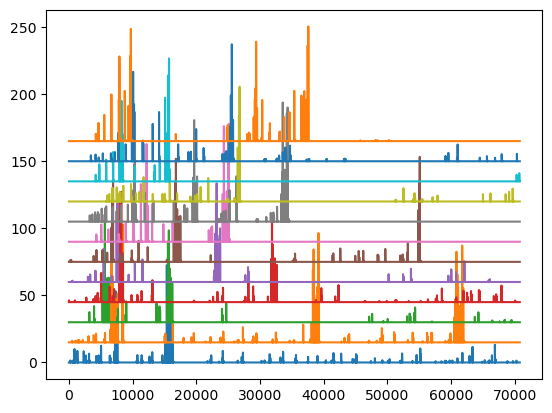

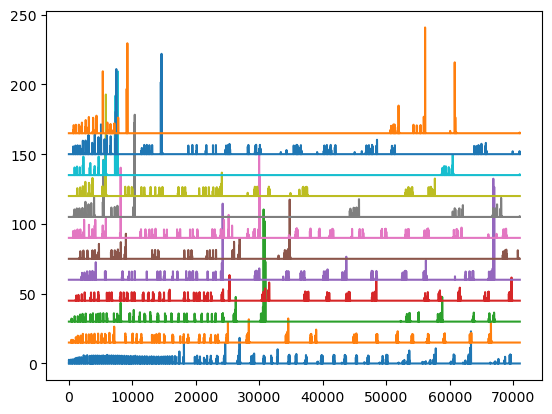

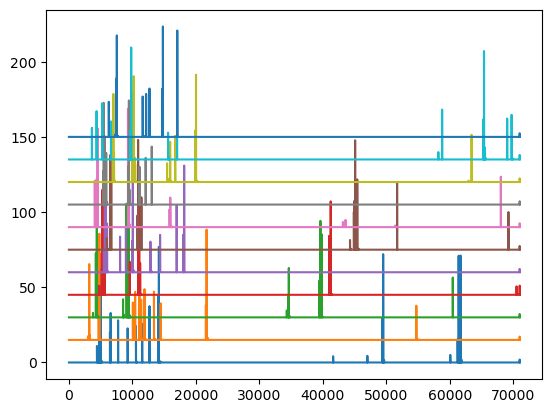

In [527]:
for i in range(len(ft_swim_times['swims'])):
    plt.figure()
    for j in range(len(ft_swim_times['swims'][i])):
        plt.plot(ft_swim_times['swims'][i][j] + 15 * j)

In [534]:
np.save(r'G:\My Drive\adenosine_paper\adenosine_paper_data\behavior\0911_mrs_suramin\proc\mrs_control\ctrl.npy',ft_swim_times)

In [57]:
#len(fish_data[0]['tail_angle'][0])